In [98]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import re

#Study files
Yelp_Open_Dataset = "Data/cleaned_reviews.csv"
#Starbucks_Sales_and_Financial_Data = ".../Data/sentiments_by_shop.csv'
#Coffee_Shop_Sales_Data_Kaggle = ".../Data/ratings_and_sentiments.csv
#National_Coffee_Association_NCA_Data = "Data/

Yelp_df =pd.read_csv(Yelp_Open_Dataset)

In [77]:
#Can we detect any anomalies in product sales, such as sudden spikes in specific items?
Yelp_df.head()

,coffee_shop_name,full_review_text,star_rating,star_rating_clean
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in love love loved the atmo...,5.0 star rating,5.0
1,The Factory - Cafe With a Soul,"12/2/2016 listed in date night: austin, ambian...",4.0 star rating,4.0
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in listed in brunch spots i...,4.0 star rating,4.0
3,The Factory - Cafe With a Soul,11/25/2016 very cool decor! good drinks nice s...,2.0 star rating,2.0
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in they are located within t...,4.0 star rating,4.0


In [78]:
#How many shops in this dataset
shop_name =Yelp_df["coffee_shop_name"].nunique()
print(shop_name)

79


In [79]:
#overall star reviews
shop_ratings = Yelp_df.groupby('coffee_shop_name')['star_rating_clean'].mean()
print(shop_ratings)

coffee_shop_name
Altaâs Cafe                   3.930000
Andersonâs Coffee Company     4.620000
Apanas Coffee & Beer            4.550847
Arturoâs Underground Cafe     4.300000
Bennu Coffee                    4.130000
                                  ...   
Thunderbird Coffee              3.970000
Trianon Coffee                  4.020408
Tuscany At 360                  3.818182
Venezia Italian Gelato          4.810000
Vintage Heart Coffee            4.170000
Name: star_rating_clean, Length: 79, dtype: float64


D:\Bootcamp\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128 (\x80) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\Bootcamp\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 153 (\x99) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


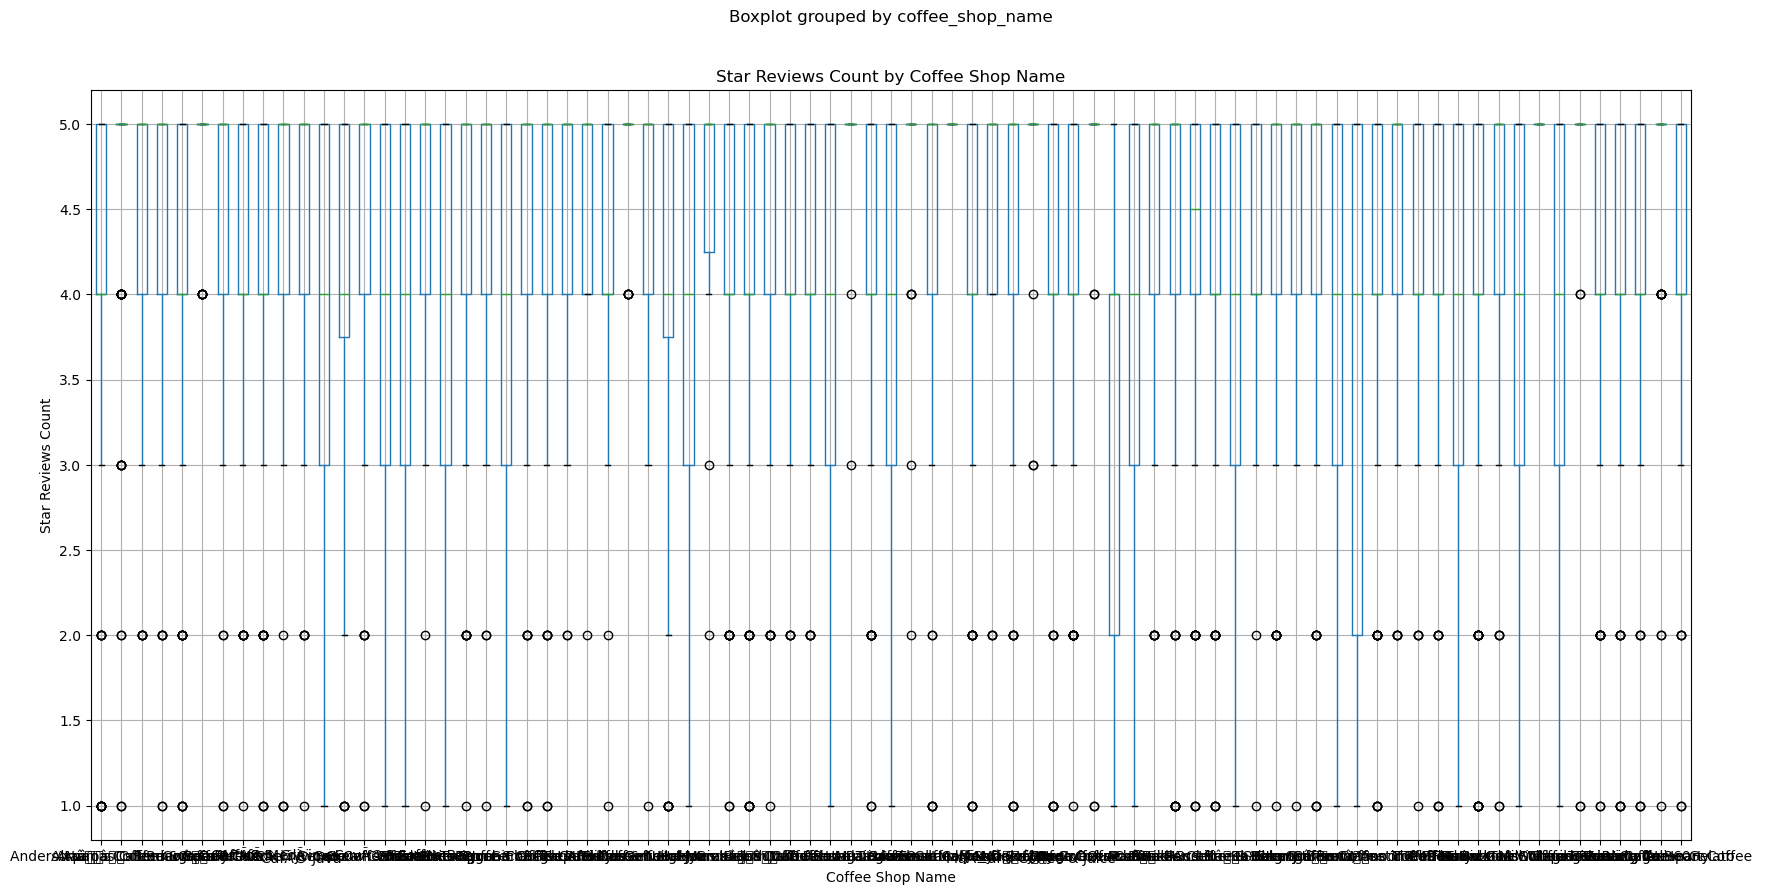

In [124]:
#How overall star reviews boplots
Yelp_df.boxplot(column='star_rating_clean', by='coffee_shop_name', figsize=(20, 10))
plt.xlabel('Coffee Shop Name')
plt.ylabel('Star Reviews Count')
plt.title('Star Reviews Count by Coffee Shop Name')
plt.show()

In [111]:
#How many five star reviews
stars =Yelp_df["star_rating"].unique()

star_rating = Yelp_df["star_rating_clean"].value_counts()
#print(star_rating)
#count_5_star = Yelp_df['star_rating_clean'].value_counts().get(5.0)
five_star_reviews = Yelp_df[Yelp_df["star_rating_clean"] == 5]
#five_star_reviews.head()
five_star_counts = five_star_reviews.groupby('coffee_shop_name')['star_rating_clean'].count()
five_star_counts.nlargest(5)

coffee_shop_name
Houndstooth Coffee              91
Venezia Italian Gelato          88
Apanas Coffee & Beer            84
Andersonâs Coffee Company     77
Epoch Coffee                    75
Name: star_rating_clean, dtype: int64

In [123]:
#Top 5 boxplot
top_shop = ["Houndstooth Coffee", "Venezia Italian Gelato", "Apanas Coffee & Beer", "Andersonâs Coffee Company", "Epoch Coffee"]
top_shop_df = five_star_counts[five_star_counts["coffee_shop_name"].isin(top_shop)]

top_shop_df.boxplot(column='star_rating_clean', by="coffee_shop_name")
plt.xlabel('Top Shop Name')
plt.ylabel('Star Reviews Count')
plt.title('Star Reviews Count by Shop Name')
plt.xticks(rotation=45)
plt.show()

KeyError: 'coffee_shop_name'

D:\Bootcamp\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128 (\x80) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\Bootcamp\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 153 (\x99) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


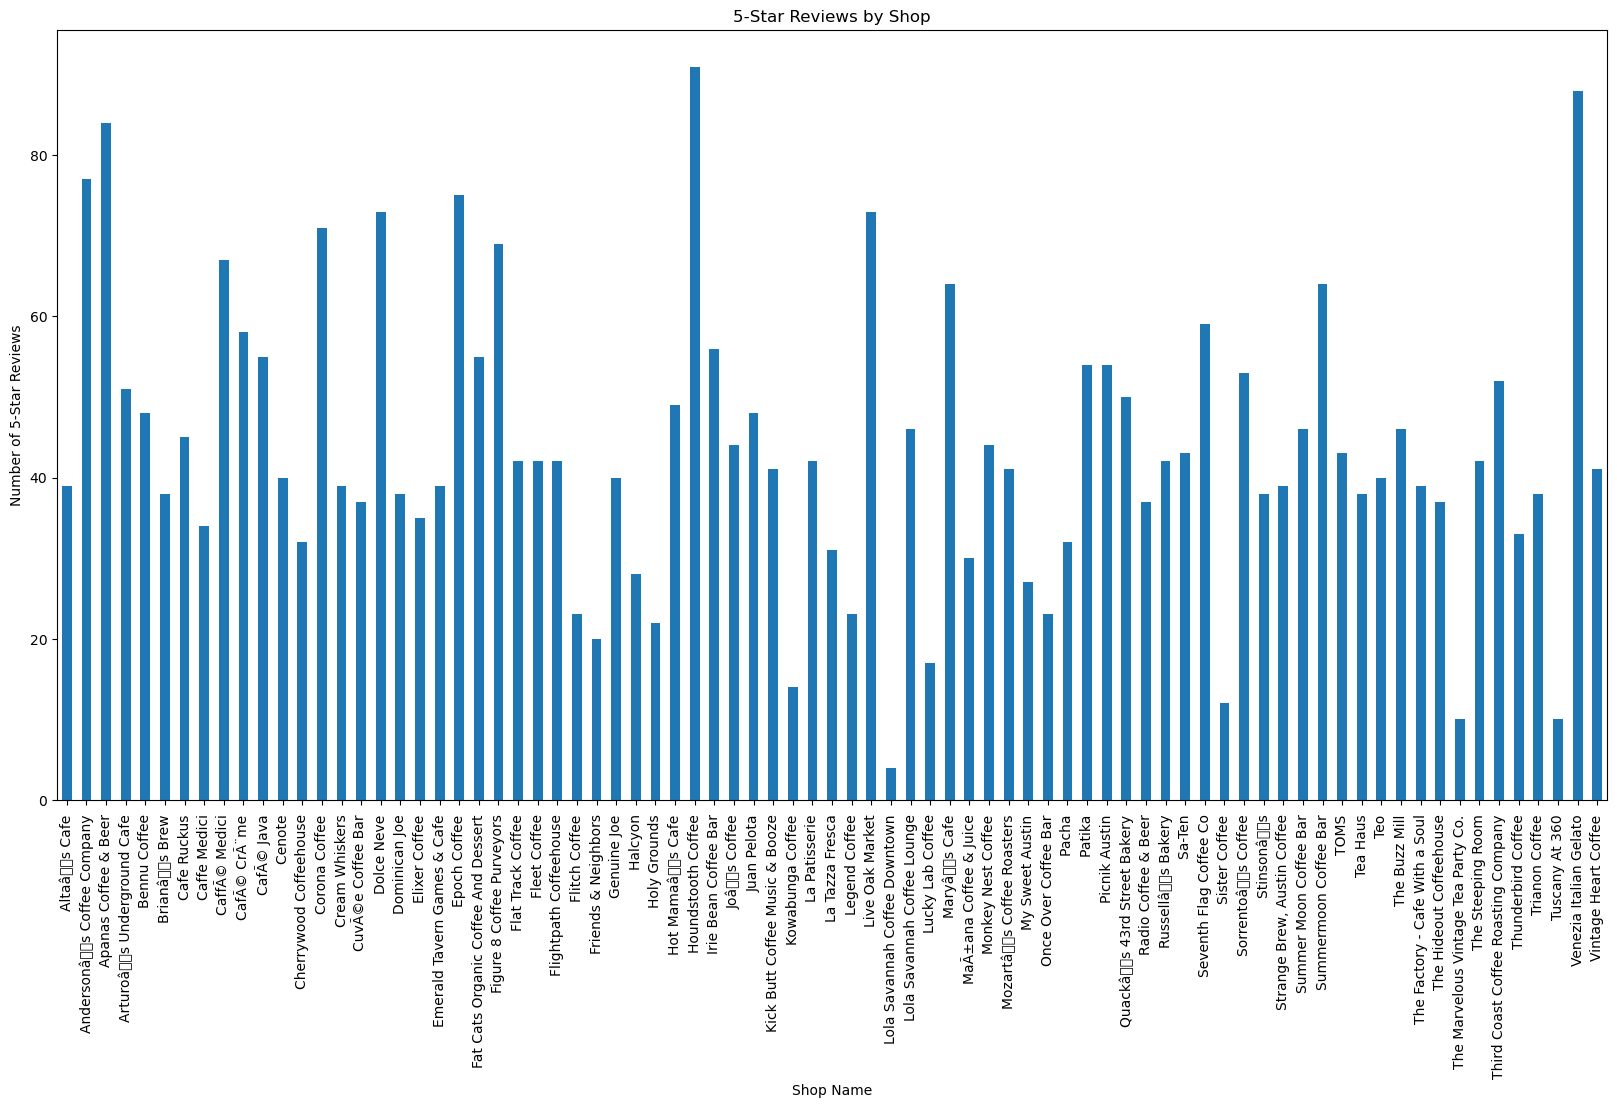

In [83]:
# Use star_rating and coffee_shop_name to create a bar chart  
five_star_counts.plot(kind='bar',figsize=(20, 10))
plt.xlabel('Shop Name')
plt.ylabel('Number of 5-Star Reviews')
plt.title('5-Star Reviews by Shop')
plt.show()

In [84]:
#Use star_rating to isolate the 5 star data, then seatch for key words
def find_keywords(text, keywords):
    found = [word for word in keywords if word in text.lower()]
    return found if found else None

#Use star_rating to isolate the 1 star data, then seatch for key words

In [85]:
#specific items trend by key words and data in full_review_text

In [103]:
#Look at date
date_pattern = r'\d{4}-\d{2}-\d{2}|\d{2}/\d{2}/\d{4}|\d{1,2}(?:st|nd|rd|th)? [A-Za-z]+ \d{4}'
    
#Yelp_df['date'] = Yelp_df['full_review_text'].str.extract(date_pattern)
Yelp_df['date'] = pd.to_datetime(Yelp_df['full_review_text'], format='%m/%d/%Y', errors='coerce')

Yelp_df

,coffee_shop_name,full_review_text,star_rating,star_rating_clean,date
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in love love loved the atmo...,5.0 star rating,5.0,NaT
1,The Factory - Cafe With a Soul,"12/2/2016 listed in date night: austin, ambian...",4.0 star rating,4.0,NaT
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in listed in brunch spots i...,4.0 star rating,4.0,NaT
3,The Factory - Cafe With a Soul,11/25/2016 very cool decor! good drinks nice s...,2.0 star rating,2.0,NaT
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in they are located within t...,4.0 star rating,4.0,NaT
...,...,...,...,...,...
6910,The Steeping Room,2/19/2015 i actually step into this restaurant...,4.0 star rating,4.0,NaT
6911,The Steeping Room,"1/21/2016 ok, the steeping room is awesome. ho...",5.0 star rating,5.0,NaT
6912,The Steeping Room,"4/30/2015 loved coming here for tea, and the a...",4.0 star rating,4.0,NaT
6913,The Steeping Room,8/2/2015 the food is just average. the booths ...,3.0 star rating,3.0,NaT
